In [1]:
import numpy
import seaborn as sns
import pandas as pd
import matplotlib
from matplotlib import *
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas.tseries.holiday as holis
from pandas.tseries.holiday import *

In [3]:
holidays = holis.USFederalHolidayCalendar().holidays(start='2002-01-01', end='2015-12-31')

In [4]:
merch_trans = pd.read_csv('data/case_final.csv',parse_dates=[0,1],index_col=1)

In [5]:
h_bool = merch_trans.index.map(lambda x: 1 if x.date() in holidays else 0)

In [6]:
first_user = merch_trans[(merch_trans['user']=='00038f0484334ac047449166cfbbf6452b31c85c') & (h_bool==0)]

In [7]:
first_user.head()

,user,amount_in_cents
time,,
2016-02-19 23:39:56.925000,00038f0484334ac047449166cfbbf6452b31c85c,1203
2016-02-19 23:41:47.026000,00038f0484334ac047449166cfbbf6452b31c85c,1203
2016-02-23 15:19:54.836000,00038f0484334ac047449166cfbbf6452b31c85c,2405
2016-02-23 15:21:08.273000,00038f0484334ac047449166cfbbf6452b31c85c,2405
2016-02-24 15:19:39.386000,00038f0484334ac047449166cfbbf6452b31c85c,1203


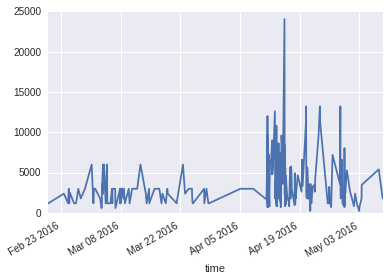

In [8]:
first_user.amount_in_cents.plot(grid=True)

In [9]:
print len(first_user)

310


In [10]:
first_stats = first_user.describe(percentiles=[0.0005,.025,.16,.84,.975,.9995])

In [11]:
first_stats

,amount_in_cents
count,310.000000
mean,3159.106452
std,2734.172656
min,241.000000
0.1%,241.000000
2.5%,722.000000
16%,1203.000000
50%,2405.000000
84%,5358.760000
97.5%,11491.000000


In [12]:
h_2sig = numpy.percentile(first_user.amount_in_cents,97.5)
l_2sig = numpy.percentile(first_user.amount_in_cents,2.5)

In [13]:
print h_2sig,l_2sig

11491.0 722.0


In [14]:
len(first_user[first_user.amount_in_cents>h_2sig]),len(first_user[first_user.amount_in_cents<l_2sig])

(8, 5)

In [15]:
first_user = first_user[(first_user.amount_in_cents<=h_2sig) & (first_user.amount_in_cents>=l_2sig)]

In [50]:
print len(first_user)

297


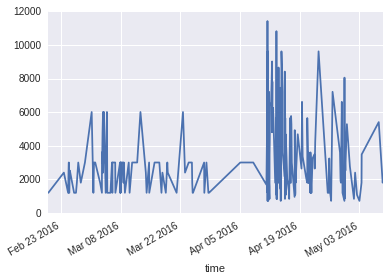

In [16]:
first_user.amount_in_cents.plot(grid=True)

In [17]:
u1_frame = pd.DataFrame()
u1_frame['weekly'] = first_user.amount_in_cents.resample('W').ffill()

In [18]:
u1_frame = u1_frame.apply(lambda x: x / numpy.max(x))

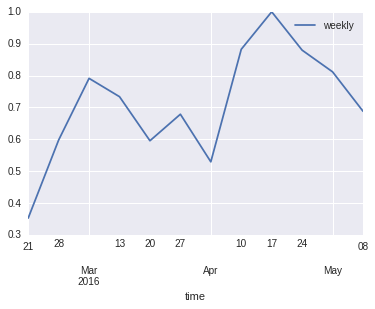

In [19]:
u1_frame.plot(grid=True)

In [20]:
users = merch_trans.user.unique()

In [21]:
print users,len(users)

['00038f0484334ac047449166cfbbf6452b31c85c'
 '0012a74e2bb1ab0073b2e18532e87474b6b7cfca'
 '001855810c25d8bb03210f8c0114de27da9cd76c' ...,
 'ffe4880511ffadf79ec49d7ee03ce445f8f1bd7e'
 'ffe54ded2eb34c35ed8e74e8a2961d30e4b1515e'
 'ffe986bb5a18d164ed9b1cc4e1c07016d396a2c2'] 8402


In [22]:
short_user = merch_trans[(merch_trans['user']=='0012a74e2bb1ab0073b2e18532e87474b6b7cfca') & (h_bool==0)]

In [23]:
short_user

,user,amount_in_cents
time,,
2016-11-04 14:50:09.257000,0012a74e2bb1ab0073b2e18532e87474b6b7cfca,5893
2016-11-10 00:19:25.407000,0012a74e2bb1ab0073b2e18532e87474b6b7cfca,3247


In [24]:
short_stats = short_user.describe(percentiles=[0.0005,.025,.16,.84,.975,.9995])

In [25]:
short_stats

,amount_in_cents
count,2.000000
mean,4570.000000
std,1871.004543
min,3247.000000
0.1%,3248.323000
2.5%,3313.150000
16%,3670.360000
50%,4570.000000
84%,5469.640000
97.5%,5826.850000


In [26]:
h_2sig = numpy.percentile(short_user.amount_in_cents,97.5)
l_2sig = numpy.percentile(short_user.amount_in_cents,2.5)

In [27]:
len(short_user[short_user.amount_in_cents>h_2sig]),len(short_user[short_user.amount_in_cents<l_2sig])

(1, 1)

In [28]:
short_user = short_user[(short_user.amount_in_cents<=h_2sig) & (short_user.amount_in_cents>=l_2sig)]

In [29]:
print len(short_user)

0


In [30]:
short_user = merch_trans[(merch_trans['user']=='0012a74e2bb1ab0073b2e18532e87474b6b7cfca') & (h_bool==0)]

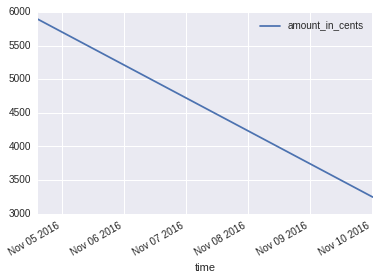

In [31]:
short_user.plot(grid=True)

In [32]:
short_frame = pd.DataFrame()
short_frame['weekly'] = short_user.amount_in_cents.resample('W').ffill()

In [33]:
short_frame = short_frame.apply(lambda x: x / numpy.max(x))

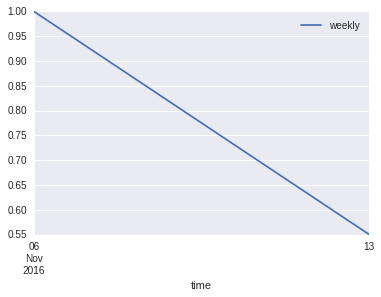

In [34]:
short_frame.plot(grid=True)

In [35]:
second_user = merch_trans[(merch_trans['user']=='001855810c25d8bb03210f8c0114de27da9cd76c') & (h_bool==0)]

In [48]:
second_user.index[0],second_user.index[-1]

(Timestamp('2016-11-20 12:15:32.278000'),
 Timestamp('2017-06-04 19:24:12.293000'))

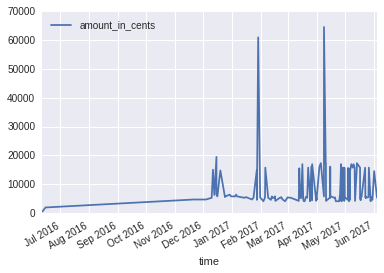

In [36]:
second_user.plot(grid=True)

In [37]:
second_stats = second_user.describe(percentiles=[0.0005,.025,.16,.84,.975,.9995])

In [38]:
second_stats

,amount_in_cents
count,195.000000
mean,7725.482051
std,7048.730423
min,481.000000
0.1%,620.971000
2.5%,4089.000000
16%,4690.000000
50%,5412.000000
84%,15028.160000
97.5%,17011.000000


In [39]:
h_2sig = numpy.percentile(second_user.amount_in_cents,97.5)
l_2sig = numpy.percentile(second_user.amount_in_cents,2.5)

In [40]:
second_user = second_user[(second_user.amount_in_cents<=h_2sig) & (second_user.amount_in_cents>=l_2sig)]

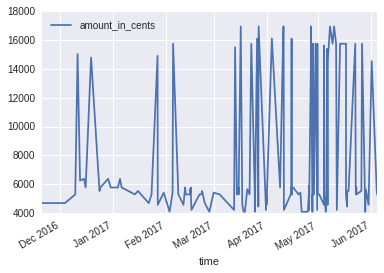

In [41]:
second_user.plot(grid=True)

In [42]:
u2_frame = pd.DataFrame()
u2_frame['weekly'] = second_user.amount_in_cents.resample('W').ffill()

In [43]:
u2_frame = u2_frame.apply(lambda x: x / numpy.max(x))

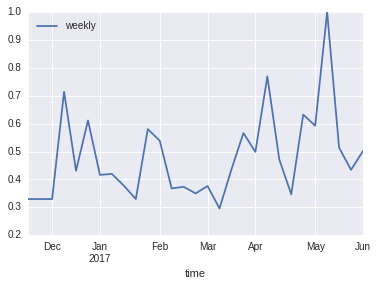

In [44]:
u2_frame.plot(grid=True)

In [49]:
u2_frame.index[0],u2_frame.index[-1]

(Timestamp('2016-11-20 00:00:00', offset='W-SUN'),
 Timestamp('2017-06-04 00:00:00', offset='W-SUN'))